In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user10\Anaconda3\envs\P

# data preprocessing

In [2]:
df = pd.read_csv('./data/3227.csv')
df['spread1'] = df['Ask1'] - df['Bid1']
df['spread2'] = df['Ask2'] - df['Bid2']
df['spread3'] = df['Ask3'] - df['Bid3']
df['spread4'] = df['Ask4'] - df['Bid4']
df['spread5'] = df['Ask5'] - df['Bid5']
df['mid1'] = (df['Ask1'] + df['Bid1']) / 2
df['mid2'] = (df['Ask2'] + df['Bid2']) / 2
df['mid3'] = (df['Ask3'] + df['Bid3']) / 2
df['mid4'] = (df['Ask4'] + df['Bid4']) / 2
df['mid5'] = (df['Ask5'] + df['Bid5']) / 2
df['a51_diff'] = df['Ask5'] - df['Ask1']
df['b15_diff'] = df['Bid1'] - df['Bid5']
df['a21_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a32_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a43_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['a54_diff_abs'] = np.abs(df['Ask2'] - df['Ask1'])
df['b21_diff_abs'] = np.abs(df['Bid2'] - df['Bid1'])
df['b32_diff_abs'] = np.abs(df['Bid3'] - df['Bid2'])
df['b43_diff_abs'] = np.abs(df['Bid4'] - df['Bid3'])
df['b54_diff_abs'] = np.abs(df['Bid5'] - df['Bid4'])
df['a_mean'] = (df['Ask1'] +df['Ask2'] +df['Ask3'] +df['Ask4'] +df['Ask5']) / 5
df['b_mean'] = (df['Bid1'] +df['Bid2'] +df['Bid3'] +df['Bid4'] +df['Bid5']) / 5
df['aq_mean'] = (df['AskQty1'] +df['AskQty2'] +df['AskQty3'] +df['AskQty4'] +df['AskQty5']) / 5
df['bq_mean'] = (df['BidQty1'] +df['BidQty2'] +df['BidQty3'] +df['BidQty4'] +df['BidQty5']) / 5
df['p_acc_diff'] = (df['Ask1'] - df['Bid1']) + (df['Ask1'] - df['Bid1']) +(df['Ask2'] - df['Bid2']) + (df['Ask3'] - df['Bid3']) + (df['Ask4'] - df['Bid4']) + (df['Ask5'] - df['Bid5'])
df['q_acc_diff'] = (df['AskQty1'] - df['BidQty1']) + (df['AskQty1'] - df['BidQty1']) +(df['AskQty2'] - df['BidQty2']) + (df['AskQty3'] - df['BidQty3']) + (df['AskQty4'] - df['BidQty4']) + (df['AskQty5'] - df['BidQty5'])
df['da1_dt'] = df['Ask1'] - df['Ask1'].shift(1)
df['da2_dt'] = df['Ask2'] - df['Ask2'].shift(1)
df['da3_dt'] = df['Ask3'] - df['Ask3'].shift(1)
df['da4_dt'] = df['Ask4'] - df['Ask4'].shift(1)
df['da5_dt'] = df['Ask5'] - df['Ask5'].shift(1)
df['db1_dt'] = df['Bid1'] - df['Bid1'].shift(1)
df['db2_dt'] = df['Bid2'] - df['Bid2'].shift(1)
df['db3_dt'] = df['Bid3'] - df['Bid3'].shift(1)
df['db4_dt'] = df['Bid4'] - df['Bid4'].shift(1)
df['db5_dt'] = df['Bid5'] - df['Bid5'].shift(1)
df['daq1_dt'] = df['AskQty1'] - df['AskQty1'].shift(1)
df['daq2_dt'] = df['AskQty2'] - df['AskQty2'].shift(1)
df['daq3_dt'] = df['AskQty3'] - df['AskQty3'].shift(1)
df['daq4_dt'] = df['AskQty4'] - df['AskQty4'].shift(1)
df['daq5_dt'] = df['AskQty5'] - df['AskQty5'].shift(1)
df['dbq1_dt'] = df['BidQty1'] - df['BidQty1'].shift(1)
df['dbq2_dt'] = df['BidQty2'] - df['BidQty2'].shift(1)
df['dbq3_dt'] = df['BidQty3'] - df['BidQty3'].shift(1)
df['dbq4_dt'] = df['BidQty4'] - df['BidQty4'].shift(1)
df['dbq5_dt'] = df['BidQty5'] - df['BidQty5'].shift(1)
df = df.drop(['Pid'], axis = 1)
df = df.drop([0])
df = df.reset_index(drop = True)
df = df.drop(['b21_diff_abs'], axis = 1)
df

,TxTime,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,2019/7/1 09:00,127.0,2,60,126.5,127.0,108,78,126.0,127.5,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019/7/1 09:00,127.0,6,62,126.5,127.0,102,79,126.0,127.5,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
2,2019/7/1 09:00,127.0,7,63,126.5,127.0,102,78,126.0,127.5,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,2019/7/1 09:00,127.0,7,93,126.5,127.0,103,78,126.0,127.5,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
4,2019/7/1 09:01,127.0,102,92,126.5,127.0,8,78,126.0,127.5,...,-95.0,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,2019/11/29 13:24,130.5,1,212,130.0,130.5,22,142,129.5,131.0,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253055,2019/11/29 13:24,0.0,0,213,130.0,130.5,22,142,129.5,131.0,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253056,2019/11/29 13:24,0.0,0,213,130.0,130.5,15,142,129.5,131.0,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253057,2019/11/29 13:24,130.5,1,213,130.0,130.5,14,142,129.5,131.0,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


In [3]:
from datetime import datetime
df['TxTime'] = pd.to_datetime(df['TxTime'])
df['TxTime'] = [str(x)[0:10] for x in df['TxTime']]
df

,TxTime,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,2019-07-01,127.0,2,60,126.5,127.0,108,78,126.0,127.5,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-07-01,127.0,6,62,126.5,127.0,102,79,126.0,127.5,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
2,2019-07-01,127.0,7,63,126.5,127.0,102,78,126.0,127.5,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,2019-07-01,127.0,7,93,126.5,127.0,103,78,126.0,127.5,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
4,2019-07-01,127.0,102,92,126.5,127.0,8,78,126.0,127.5,...,-95.0,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,2019-11-29,130.5,1,212,130.0,130.5,22,142,129.5,131.0,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253055,2019-11-29,0.0,0,213,130.0,130.5,22,142,129.5,131.0,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253056,2019-11-29,0.0,0,213,130.0,130.5,15,142,129.5,131.0,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253057,2019-11-29,130.5,1,213,130.0,130.5,14,142,129.5,131.0,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


In [5]:
df2 = df.drop(['TxTime'], axis = 1)
df2

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
2,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
4,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,-95.0,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253055,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253056,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253057,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


# def

In [6]:
#normalize
def normalize(df):
    norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return norm
#scale back to the true range
def true_range(df, x):
    X = (x * (df['mid1'].max() - df['mid1'].min())) + df['mid1'].min()
    return X
#rolling windows
def train_windows(df, ref_day=5, predict_day=1):
    X_train, Y_train = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        X_train.append(np.array(df.iloc[i:i+ref_day,:-1]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]["mid1"]))
    return np.array(X_train), np.array(Y_train)
#LSTM (when add the drop out layer in order to deal with overfitting)
def lstm_stock_model(shape):
    model = Sequential()
    #return sequence = True -> means the network will have long memory
    model.add(LSTM(256, input_shape=(shape[1], shape[2]), return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(1)))
    model.add(Flatten())
    model.add(Dense(5,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
    model.summary()
    return model

# model setting

In [7]:
#adjust the parameters in lstm
batch_size = [128, 256, 512]
validation_split = [0.1, 0.2, 0.3]
#normalize
norm_df = normalize(df2)
#train test split
test = norm_df[-round(df2.shape[0]*0.3):]
test = test.reset_index(drop = True)
train = norm_df[:round(df2.shape[0]*0.7)]
#10 days forecast next day
X_train, Y_train = train_windows(train, 10, 1)
X_test, Y_test = train_windows(test, 10, 1)

# model

In [8]:
#adding drop out layer(pct = 0.5)
#batch size = 256
#validation split = 0.2 (not letting val loss < loss)
#early stop -> val loss patience = 10
model_1 = lstm_stock_model(X_train.shape)
callback = EarlyStopping(monitor="val_mean_absolute_error", patience=10, verbose=1, mode="min")
history_1 = model_1.fit(X_train, Y_train, epochs=500, batch_size=batch_size[1], validation_split=validation_split[1], callbacks=[callback], shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 256)           330752    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 1)             257       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

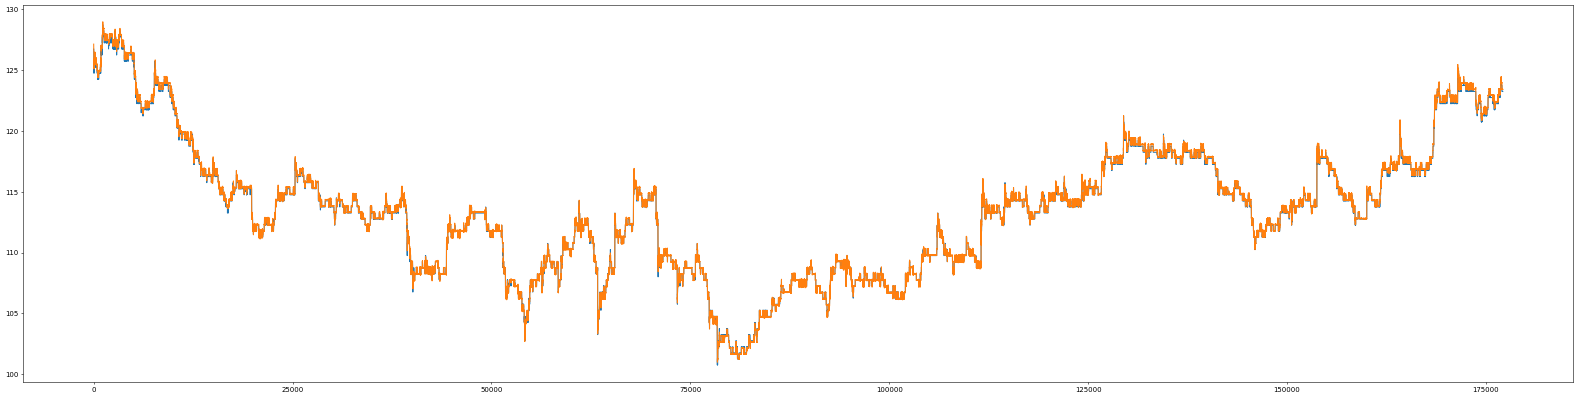

In [10]:
#train error
X_t1 = model_1.predict(X_train)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df2, Y_train))
plt.plot(true_range(df2, X_t1))

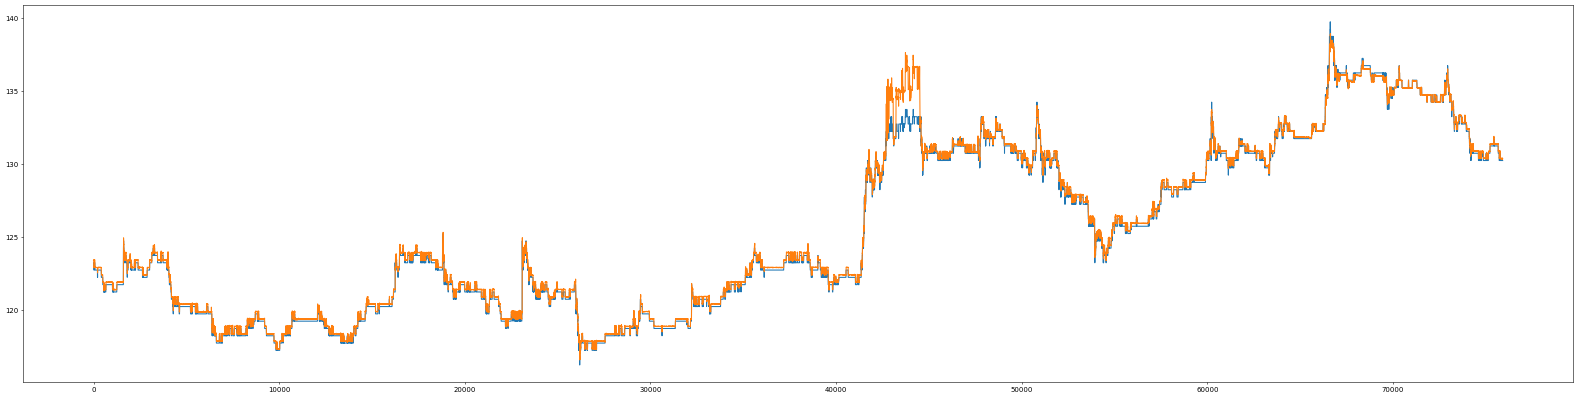

In [11]:
#test error
Xt1 = model_1.predict(X_test)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df2, Y_test))
plt.plot(true_range(df2, Xt1))

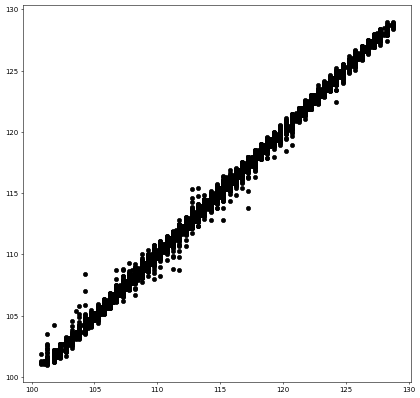

In [12]:
#train error scatter plot
plt.figure(figsize=(10,10),dpi=50)
plt.scatter(true_range(df2, Y_train), true_range(df2, X_t1), color = ['black'])

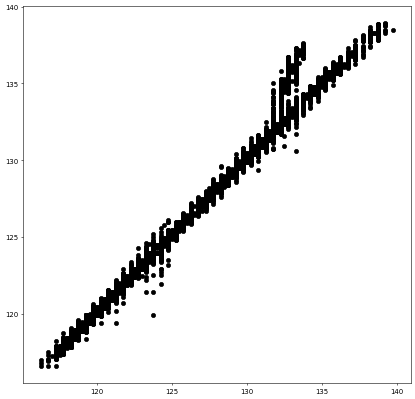

In [14]:
#test error scatter plot
plt.figure(figsize=(10,10),dpi=50)
plt.scatter(true_range(df2, Y_test), true_range(df2, Xt1), color = ['black'])

# strategy setting

In [18]:
df['equity_value'] = pd.DataFrame(data = np.zeros((len(df), 1)), index = df.index[:])
df_test = df[-round(df2.shape[0]*0.3):]
df_train = df[:round(df.shape[0]*0.7)]
#1~10 pred 11, hence start from 11
df_train = df_train.iloc[11:, :]
df_test = df_test.iloc[11:, :]
#calculate pred return
df_train['pred_mid'] = true_range(df2, X_t1)
df_train['mid_shift'] = df_train['mid1'].shift(1)
df_test['pred_mid'] = true_range(df2, Xt1)
df_test['mid_shift'] = df_test['mid1'].shift(1)
#pred return train
df_train['pred_return'] = (df_train['pred_mid'] / df_train['mid_shift']) - 1
#pred return test
df_test['pred_return'] = (df_test['pred_mid'] / df_test['mid_shift']) - 1

In [22]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_train = df_train.drop([0])
df_train = df_train.reset_index(drop = True)
df_test = df_test.drop([0])
df_test = df_test.reset_index(drop = True)

In [23]:
df_train

,TxTime,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,...,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,equity_value,pred_mid,mid_shift,pred_return
0,2019-07-01,126.5,5,74,126.5,127.0,53,83,126.0,127.5,...,0.0,15.0,1.0,0.0,0.0,0.0,0.0,127.063995,126.75,0.002477
1,2019-07-01,126.5,4,91,126.5,127.0,57,83,126.0,127.5,...,0.0,17.0,0.0,0.0,0.0,0.0,0.0,127.084908,126.75,0.002642
2,2019-07-01,126.5,5,110,126.5,127.0,66,81,126.0,127.5,...,0.0,19.0,-2.0,0.0,1.0,0.0,0.0,126.997208,126.75,0.001950
3,2019-07-01,126.5,6,109,126.5,127.0,67,121,126.0,127.5,...,1.0,-1.0,40.0,0.0,0.0,0.0,0.0,127.127251,126.75,0.002976
4,2019-07-01,126.5,12,99,126.5,127.0,74,120,126.0,127.5,...,0.0,-10.0,-1.0,30.0,0.0,0.0,0.0,127.071793,126.75,0.002539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177124,2019-10-23,0.0,0,58,123.0,123.5,50,140,122.5,124.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,123.433060,123.25,0.001485
177125,2019-10-23,0.0,0,58,123.0,123.5,48,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.430557,123.25,0.001465
177126,2019-10-23,0.0,0,58,123.0,123.5,50,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.429092,123.25,0.001453
177127,2019-10-23,0.0,0,58,123.0,123.5,50,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.433014,123.25,0.001485


In [24]:
df_test

,TxTime,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,...,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,equity_value,pred_mid,mid_shift,pred_return
0,2019-10-23,0.0,0,60,123.0,123.5,64,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.434212,123.25,0.001495
1,2019-10-23,0.0,0,60,123.0,123.5,66,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.433823,123.25,0.001491
2,2019-10-23,0.0,0,60,123.0,123.5,66,140,122.5,124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.439438,123.25,0.001537
3,2019-10-23,123.0,1,59,123.0,123.5,66,143,122.5,124.0,...,0.0,-1.0,3.0,0.0,0.0,0.0,0.0,123.434006,123.25,0.001493
4,2019-10-23,123.0,1,58,123.0,123.5,66,143,122.5,124.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,123.433090,123.25,0.001486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75901,2019-11-29,130.5,1,212,130.0,130.5,22,142,129.5,131.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,130.354126,130.25,0.000799
75902,2019-11-29,0.0,0,213,130.0,130.5,22,142,129.5,131.0,...,0.0,1.0,0.0,0.0,0.0,-1.0,0.0,130.368958,130.25,0.000913
75903,2019-11-29,0.0,0,213,130.0,130.5,15,142,129.5,131.0,...,0.0,0.0,0.0,-4.0,-10.0,1.0,0.0,130.361343,130.25,0.000855
75904,2019-11-29,130.5,1,213,130.0,130.5,14,142,129.5,131.0,...,0.0,0.0,0.0,-1.0,0.0,-1.0,0.0,130.348267,130.25,0.000754


In [41]:
np.sum(df_train['pred_return'] > 0.001)

49127

In [40]:
np.sum(df_train['pred_return'] < -0.001)

7827

In [43]:
#setting parameters
import itertools 
long_side, short_side = [0.003, 0.0025, 0.002, 0.0015, 0.001], [-0.003, -0.0025, -0.002, -0.0015, -0.001]
paras = list(itertools.product(long_side, short_side))
paras

[(0.003, -0.003),
 (0.003, -0.0025),
 (0.003, -0.002),
 (0.003, -0.0015),
 (0.003, -0.001),
 (0.0025, -0.003),
 (0.0025, -0.0025),
 (0.0025, -0.002),
 (0.0025, -0.0015),
 (0.0025, -0.001),
 (0.002, -0.003),
 (0.002, -0.0025),
 (0.002, -0.002),
 (0.002, -0.0015),
 (0.002, -0.001),
 (0.0015, -0.003),
 (0.0015, -0.0025),
 (0.0015, -0.002),
 (0.0015, -0.0015),
 (0.0015, -0.001),
 (0.001, -0.003),
 (0.001, -0.0025),
 (0.001, -0.002),
 (0.001, -0.0015),
 (0.001, -0.001)]

# main strategy

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

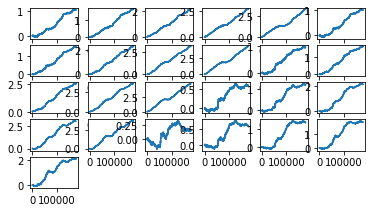

In [44]:
for l in range(len(paras)):
    df_train['side'] = pd.DataFrame(data = np.zeros((len(df_train), 1)), index = df_train.index[:])
    for j in range(len(df_train)):
        if df_train['pred_return'].iloc[j] > paras[l][0]:
            df_train['side'].iloc[j] = 1
        elif df_train['pred_return'].iloc[j] < paras[l][1]:
            df_train['side'].iloc[j] = -1
    date_idx = df_train['TxTime'].unique()
    equity_value = pd.DataFrame()
    for k in date_idx:
        df = df_train[df_train.TxTime == k]
        side = 0
        for i in range(len(df)):
            #first tick
            if i == 0:
                if df['side'].iloc[i] == 1:
                    side = 1
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                    df['equity_value'].iloc[i] = 0
                elif df['side'].iloc[i] == -1:
                    side = -1
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                    df['equity_value'].iloc[i] = - 0.0015
                else:
                    side = 0
                    df['equity_value'].iloc[i] = 0
            #last tick
            elif i == (len(df) - 1):
                if side == 1:
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                elif side == -1:
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                else:
                    df['equity_value'].iloc[i] = 0
            else:
                if (side == 1 and df['side'].iloc[i] == 1) or (side == 1 and df['side'].iloc[i] == 0):
                    side = 1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                elif side == 1 and df['side'].iloc[i] == -1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == 0:
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif side == 0 and df['side'].iloc[i] == 1:
                    side = 1
                    df['equity_value'].iloc[i] = 0
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == -1:
                    side = -1
                    df['equity_value'].iloc[i] = - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif (side == -1 and df['side'].iloc[i] == 0) or (side == -1 and df['side'].iloc[i] == -1):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1)
                elif side == -1 and df['side'].iloc[i] == 1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
        equity_value = pd.concat([equity_value, df[['equity_value']]])
    plt.subplot(6, 6, l+1)
    equity_value_ = np.cumsum(equity_value)
    plt.plot(equity_value_)                 

In [49]:
#test set
idx = [3, 4, 8, 9, 12, 13, 14, 18, 19]

In [50]:
paras[idx[0]]

(0.003, -0.0015)

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\U

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-pa

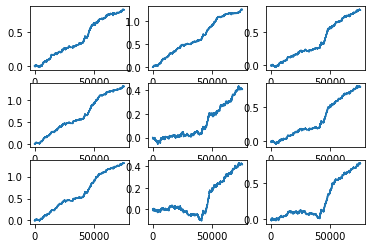

In [51]:
for l in range(len(idx)):
    df_test['side'] = pd.DataFrame(data = np.zeros((len(df_test), 1)), index = df_test.index[:])
    for j in range(len(df_test)):
        if df_test['pred_return'].iloc[j] > paras[idx[l]][0]:
            df_test['side'].iloc[j] = 1
        elif df_test['pred_return'].iloc[j] < paras[idx[l]][1]:
            df_test['side'].iloc[j] = -1
    date_idx = df_test['TxTime'].unique()
    equity_value = pd.DataFrame()
    for k in date_idx:
        df = df_test[df_test.TxTime == k]
        side = 0
        for i in range(len(df)):
            #first tick
            if i == 0:
                if df['side'].iloc[i] == 1:
                    side = 1
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                    df['equity_value'].iloc[i] = 0
                elif df['side'].iloc[i] == -1:
                    side = -1
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                    df['equity_value'].iloc[i] = - 0.0015
                else:
                    side = 0
                    df['equity_value'].iloc[i] = 0
            #last tick
            elif i == (len(df) - 1):
                if side == 1:
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                elif side == -1:
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                else:
                    df['equity_value'].iloc[i] = 0
            else:
                if (side == 1 and df['side'].iloc[i] == 1) or (side == 1 and df['side'].iloc[i] == 0):
                    side = 1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) 
                elif side == 1 and df['side'].iloc[i] == -1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Bid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1) - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == 0:
                    side = 0
                    df['equity_value'].iloc[i] = 0
                elif side == 0 and df['side'].iloc[i] == 1:
                    side = 1
                    df['equity_value'].iloc[i] = 0
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
                elif side == 0 and df['side'].iloc[i] == -1:
                    side = -1
                    df['equity_value'].iloc[i] = - 0.0015
                    df['mid1'].iloc[i] = df['Bid1'].iloc[i]
                elif (side == -1 and df['side'].iloc[i] == 0) or (side == -1 and df['side'].iloc[i] == -1):
                    side = -1
                    df['equity_value'].iloc[i] = (df['mid1'].iloc[i] / df['mid1'].iloc[i-1] - 1) * (-1)
                elif side == -1 and df['side'].iloc[i] == 1:
                    side = 0
                    df['equity_value'].iloc[i] = (df['Ask1'].iloc[i] / df['mid1'].iloc[i-1] - 1)
                    df['mid1'].iloc[i] = df['Ask1'].iloc[i]
        equity_value = pd.concat([equity_value, df[['equity_value']]])
    plt.subplot(3, 3, l+1)
    equity_value_ = np.cumsum(equity_value)
    plt.plot(equity_value_)              